# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
act = pd.read_csv('/Users/queenbee/notebooks/DSI-US-5/1_week/project-1/data/act.csv')
sat = pd.read_csv('/Users/queenbee/notebooks/DSI-US-5/1_week/project-1/data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [2]:
print(sat[:10], act[:10])

   Unnamed: 0                 State Participation  \
0           0               Alabama            5%   
1           1                Alaska           38%   
2           2               Arizona           30%   
3           3              Arkansas            3%   
4           4            California           53%   
5           5              Colorado           11%   
6           6           Connecticut          100%   
7           7              Delaware          100%   
8           8  District of Columbia          100%   
9           9               Florida           83%   

   Evidence-Based Reading and Writing  Math  Total  
0                                 593   572   1165  
1                                 547   533   1080  
2                                 563   553   1116  
3                                 614   594   1208  
4                                 531   524   1055  
5                                 606   595   1201  
6                                 530   512  

##### 3. Describe in words what each variable (column) is.

For ACT: Unnamed (index), State (Name of state), Participation (# of student population who took the test), English (English score), Math (Math score), Reading (Reading score), Science (Science score), Composite (Average of scores rounded by 0.5)

For SAT: Unnamed (index), State (Name of State), Evidence-Based Reading and Writing (Reading comprehension score), Math (Math Score), Total (sum of two previous sections)

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [3]:
act_null_sum = act.isnull().sum()
sat_null_sum = sat.isnull().sum()
display (act_null_sum, sat_null_sum)

# While there are no missing values in the dataset,
# the participation column shows some states having really low participation records
# because the state prefers one test over another.

sat['Participation']= sat['Participation'].str[:-1].astype("float") / 100.0
act['Participation']= act['Participation'].str.rstrip('%').astype('float') / 100.0
# Removed the percentage sign and changed the type to float. 



act = act[act.State != 'National']
# I also removed the first row of ACT because it contains the national average. This will skew our dataset.



Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

##### 5. Print the types of each column.

In [4]:
for col in sat:
    print(sat[col].dtype)
    
    # changed the SAT scores to float.

int64
object
float64
int64
int64
int64


In [5]:
for col in act:
    print(act[col].dtype)

int64
object
float64
float64
float64
float64
float64
float64


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

The SAT scores should be reassigned to float for consistency and compatability sake (to use with the ACT dataset). I might need to normalize them down the road.


In [6]:
sat_columns_float = ['Evidence-Based Reading and Writing', 'Math', 'Total']

for i in sat_columns_float:
    sat[i] = sat[i].apply(lambda x: float(x))


## Deleted Unnamed: 0 columns for SAT and ACT!
del act['Unnamed: 0']
del sat['Unnamed: 0']

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [7]:
sat_state_ebrw_score = sat.set_index('State')['Evidence-Based Reading and Writing'].to_dict()
sat_state_math_score = sat.set_index('State')['Math'].to_dict()
sat_state_total_score = sat.set_index('State')['Total'].to_dict()
sat_state_participation = sat.set_index('State')['Participation'].to_dict()

act_state_english_score = act.set_index('State')['English'].to_dict()
act_state_math_score = act.set_index('State')['Math'].to_dict()
act_state_science_score = act.set_index('State')['Science'].to_dict()
act_state_composite_score = act.set_index('State')['Composite'].to_dict()
act_state_participation = act.set_index('State')['Participation'].to_dict()


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [8]:
sat_list = sat.to_dict('list')
act_list = act.to_dict('list')

#converted each value to an iterable list

##### 9. Merge the dataframes on the state column.

In [9]:
combined_tests = pd.merge(sat, act, on = 'State', how= 'outer')

combined_tests = combined_tests.rename(columns= {
    'Unnamed: 0_x':'SAT_Unnamed',
    'Participation_x':'SAT_Participation',
    'Math_x':'SAT_Math', 
    'Total':'SAT_Total',
    'Unnamed: 0_y':'ACT_Unnamed',
    'Participation_y':'ACT_Participation',
    'Math_y':'ACT_Math',
    'Composite':'ACT_Composite'
})


#Renamed columns for clarity!


combined_tests.at[20, 'SAT_Math'] = 524.0
combined_tests.at[20, 'Science'] = 23.2
## Maryland had incorrect values for ACT Science and SAT Math. Fixed them according to 2017 data.

combined_tests

,State,SAT_Participation,Evidence-Based Reading and Writing,SAT_Math,SAT_Total,ACT_Participation,English,ACT_Math,Reading,Science,ACT_Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606.0,595.0,1201.0,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [10]:
#Please reference code above.

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [11]:
numeric_column = ['Evidence-Based Reading and Writing', 'SAT_Math', 'SAT_Total', 'English', 'ACT_Math', 'Reading', 'Science', 'ACT_Composite']

for i in numeric_column:
    print('The max of '  + str(i)+ ' is: ' + str(combined_tests[i].max()) + '\n')
    
for i in numeric_column:
    print('The min of '+ str(i)+ ' is: ' + str(combined_tests[i].min()) + '\n')


The max of Evidence-Based Reading and Writing is: 644.0

The max of SAT_Math is: 651.0

The max of SAT_Total is: 1295.0

The max of English is: 25.5

The max of ACT_Math is: 25.3

The max of Reading is: 26.0

The max of Science is: 24.9

The max of ACT_Composite is: 25.5

The min of Evidence-Based Reading and Writing is: 482.0

The min of SAT_Math is: 468.0

The min of SAT_Total is: 950.0

The min of English is: 16.3

The min of ACT_Math is: 18.0

The min of Reading is: 18.1

The min of Science is: 18.2

The min of ACT_Composite is: 17.8



##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [12]:
sd = []
   
def std_dev(df):
    sd.append([df[column].std() for column in df.select_dtypes(include=['float64'])])

std_dev(combined_tests)
sd

[[0.35276632270013036,
  45.66690138768932,
  47.12139516560329,
  92.49481172519046,
  0.32140842015886834,
  2.35367713980303,
  1.9819894936505533,
  2.0672706264873146,
  1.7393530462812443,
  2.020694891154341]]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [13]:
combined_tests.shape 

(51, 11)

In [14]:
sd_series = pd.Series(sd[0]) #get SD and turned it into pd.Series.
sd_series.index = combined_tests.select_dtypes(include=['float64']).columns 
sd_series.round(2)

SAT_Participation                      0.35
Evidence-Based Reading and Writing    45.67
SAT_Math                              47.12
SAT_Total                             92.49
ACT_Participation                      0.32
English                                2.35
ACT_Math                               1.98
Reading                                2.07
Science                                1.74
ACT_Composite                          2.02
dtype: float64

In [15]:
std_combined_tests = combined_tests.append(sd_series.round(2), ignore_index=True) #added standard dev. to row 51
std_combined_tests= std_combined_tests.rename({51:'Standard Dev.'})

# SD added as Standard Deviation on row 51.

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [16]:
descend_df = std_combined_tests.sort_values(['SAT_Participation', 'Evidence-Based Reading and Writing'], ascending = False)

descend_df

# descend_df organized by SAT Participation rate. If there is a tie, it is based on EBRW column. Standard Dev. row included. 

,State,SAT_Participation,Evidence-Based Reading and Writing,SAT_Math,SAT_Total,ACT_Participation,English,ACT_Math,Reading,Science,ACT_Composite
6,Connecticut,1.00,530.00,512.00,1041.00,0.31,25.50,24.60,25.60,24.60,25.20
22,Michigan,1.00,509.00,495.00,1005.00,0.29,24.10,23.70,24.50,23.80,24.10
7,Delaware,1.00,503.00,492.00,996.00,0.18,24.10,23.40,24.80,23.60,24.10
8,District of Columbia,1.00,482.00,468.00,950.00,0.32,24.40,23.50,24.90,23.50,24.20
29,New Hampshire,0.96,532.00,520.00,1052.00,0.18,25.40,25.10,26.00,24.90,25.50
19,Maine,0.95,513.00,499.00,1012.00,0.08,24.20,24.00,24.80,23.70,24.30
12,Idaho,0.93,513.00,493.00,1005.00,0.38,21.90,21.80,23.00,22.10,22.30
9,Florida,0.83,520.00,497.00,1017.00,0.73,19.00,19.40,21.00,19.40,19.80
21,Massachusetts,0.76,555.00,551.00,1107.00,0.29,25.40,25.30,25.90,24.70,25.40
39,Rhode Island,0.71,539.00,524.00,1062.00,0.21,24.00,23.30,24.70,23.40,24.00


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [17]:
sat_filter = descend_df[descend_df['SAT_Participation'] > .50]
sat_filter

,State,SAT_Participation,Evidence-Based Reading and Writing,SAT_Math,SAT_Total,ACT_Participation,English,ACT_Math,Reading,Science,ACT_Composite
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5
19,Maine,0.95,513.0,499.0,1012.0,0.08,24.2,24.0,24.8,23.7,24.3
12,Idaho,0.93,513.0,493.0,1005.0,0.38,21.9,21.8,23.0,22.1,22.3
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
21,Massachusetts,0.76,555.0,551.0,1107.0,0.29,25.4,25.3,25.9,24.7,25.4
39,Rhode Island,0.71,539.0,524.0,1062.0,0.21,24.0,23.3,24.7,23.4,24.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

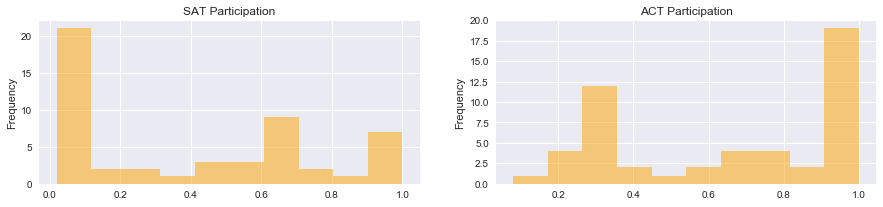

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 3))


combined_tests['SAT_Participation'].plot(ax= ax[0], title = 'SAT Participation', kind = 'hist', color = 'orange', alpha = .5)

combined_tests['ACT_Participation'].plot(ax= ax[1], title = 'ACT Participation', kind = 'hist', color = 'orange', alpha = .5)




##### 17. Plot the Math(s) distributions from both data sets.

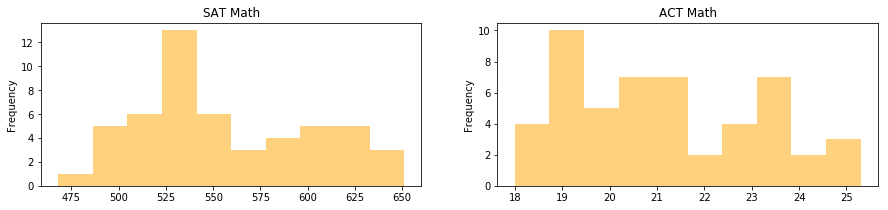

In [19]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 3))


combined_tests['SAT_Math'].plot(ax= ax[0], title = 'SAT Math', kind = 'hist', color = 'orange', alpha = .5)
combined_tests['ACT_Math'].plot(ax= ax[1], title = 'ACT Math', kind = 'hist', color = 'orange', alpha = .5)

##### 18. Plot the Verbal distributions from both data sets.

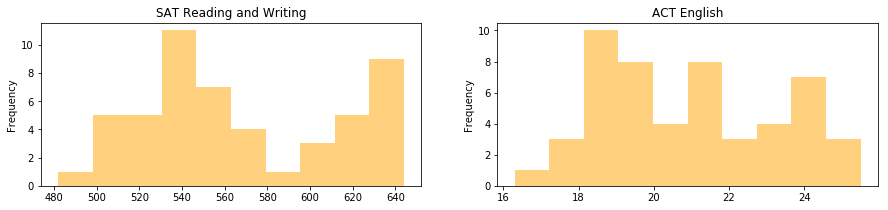

In [20]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 3))


combined_tests['Evidence-Based Reading and Writing'].plot(ax= ax[0], title = 'SAT Reading and Writing', kind = 'hist', color = 'orange', alpha = .5)
combined_tests['English'].plot(ax= ax[1], title = 'ACT English', kind = 'hist', color = 'orange', alpha = .5)

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

We assume that it would be normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

Most do not look like it was normally distributed. SAT Math slightly does with a right skew but it is not look like a true normal distribution.

##### 21. Plot some scatterplots examining relationships between all variables.

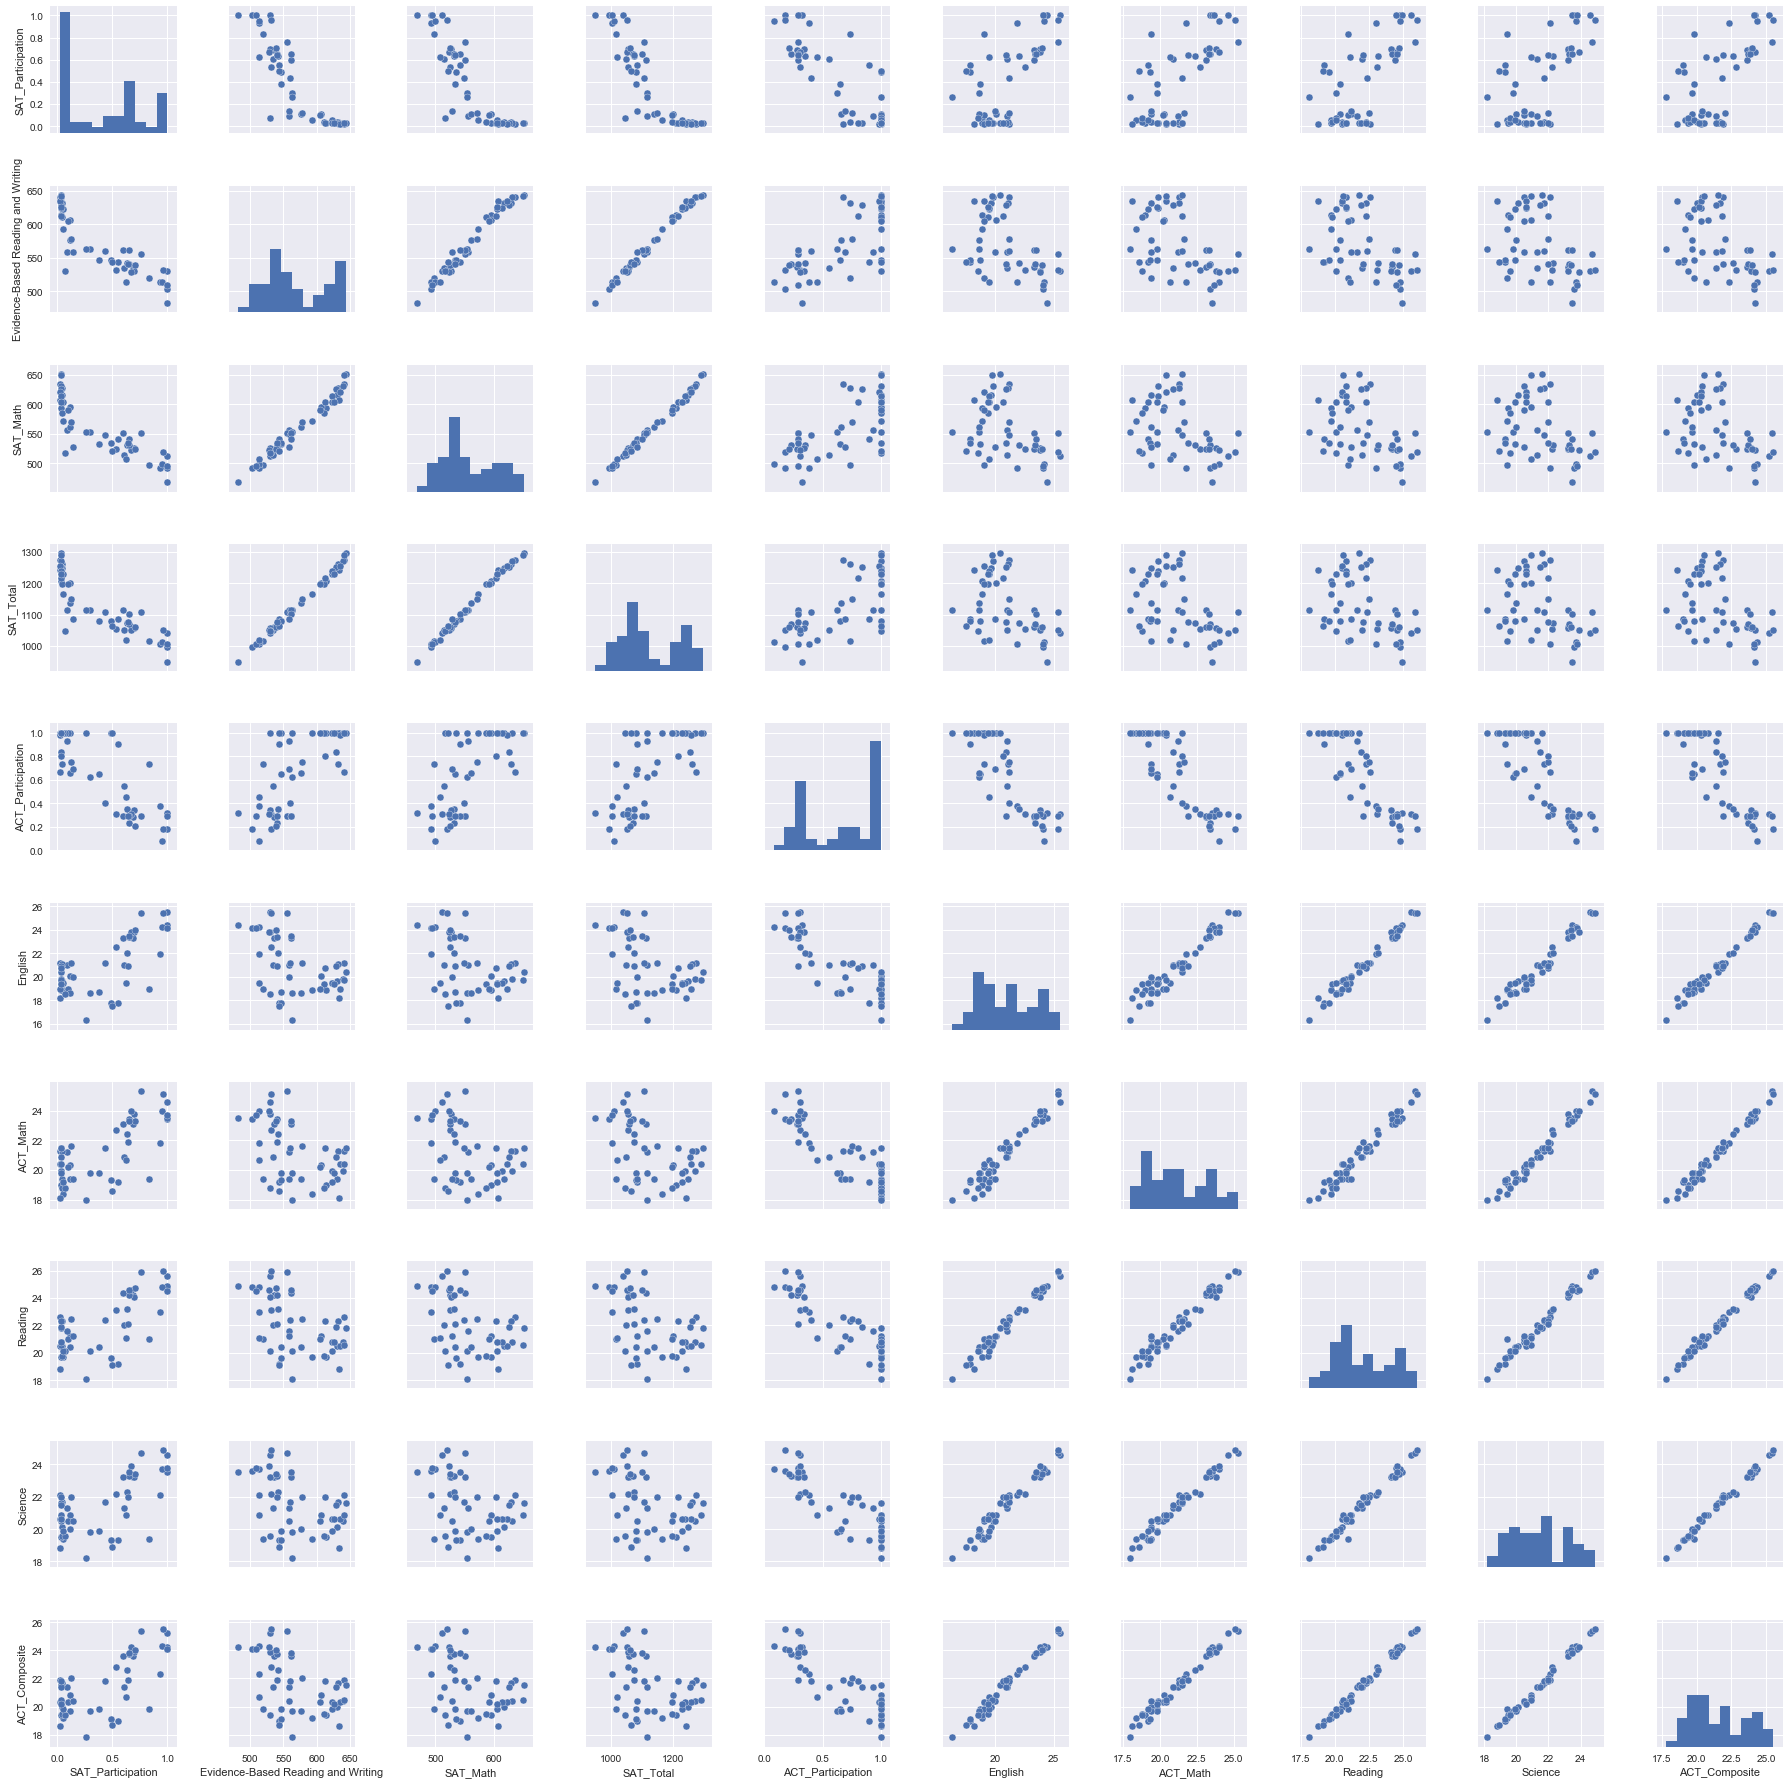

In [21]:
import seaborn as sns
sns.pairplot(combined_tests)

### Follow up analysis on some interesting correlations :

Text(0.5,1,'SAT Correlation of Score and Participation')

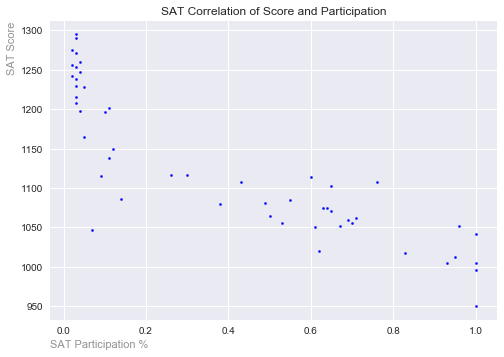

In [22]:
x = combined_tests['SAT_Participation']
y = combined_tests['SAT_Total']

plt.scatter(x, y, color='blue', s=5)
plt.xlabel('SAT Participation %', position = (0,0), ha = "left", alpha = 0.5)
plt.ylabel('SAT Score', position = (0,1), ha = 'right', alpha = 0.5)
plt.title('SAT Correlation of Score and Participation')

### Preliminary Thoughts for SAT Participation Rates and Total Scores:

There seems to be a slight correlation where states that have lower participation rates tend to have higher scores. In a way, that makes sense because only students who have a specific purpose (or drive) would take the SAT's in places where it is uncommon for students to take the SAT. That will also bring the average too. 

Let's check out whether there is a similar correlation for ACT participation rates and composite scores!

(Oh and ignore the outlier please, it's just the standard deviation!)

Text(0.5,1,'ACT Correlation of Score and Participation')

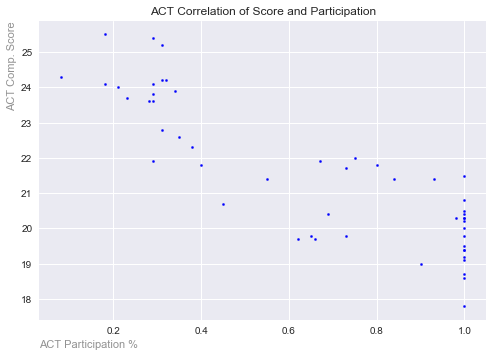

In [23]:
x2 = combined_tests['ACT_Participation']
y2 = combined_tests['ACT_Composite']

plt.scatter(x2, y2, color = 'blue', s=5)
plt.xlabel('ACT Participation %', position = (0,0), ha = "left", alpha = 0.5)
plt.ylabel('ACT Comp. Score', position = (0,1), ha = 'right', alpha = 0.5)
plt.title('ACT Correlation of Score and Participation')

### Preliminary thoughts for ACT Participation Rate and Composite Scores:

There is a similiar correlation for ACT participation rates and composite scores! Students receive higher scores in states that have low participation rates. However, the SAT correlation looks stronger.

##### 22. Are there any interesting relationships to note?

In [24]:
# please check the markdown notes above.

##### 23. Create box plots for each variable. 

Text(0,0.5,'Score')

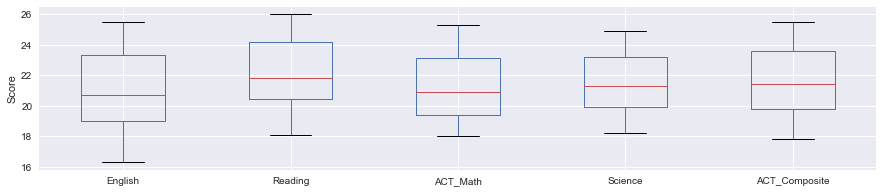

In [25]:
plt.figure(figsize = (15, 3))
act_boxplot = combined_tests.boxplot(['English', 'Reading', 'ACT_Math', 'Science', 'ACT_Composite'])
plt.ylabel('Score')

Text(0,0.5,'Score')

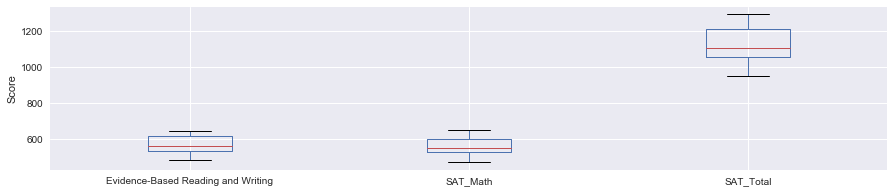

In [26]:
plt.figure(figsize = (15, 3))
sat_boxplot = combined_tests.boxplot(['Evidence-Based Reading and Writing', 'SAT_Math', 'SAT_Total'])
plt.ylabel('Score')
# Looks like the distribution for SAT is smaller than the ACT. 

Text(0,0.5,'Participation Rate')

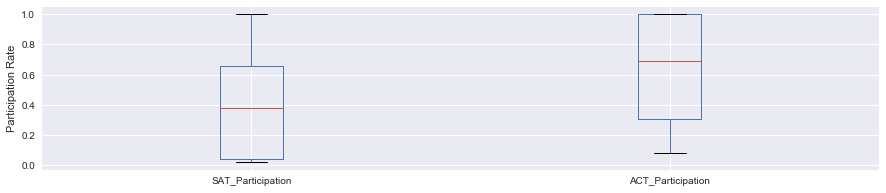

In [27]:
plt.figure(figsize = (15, 3))
participation_box = combined_tests.boxplot(['SAT_Participation', 'ACT_Participation'])
plt.ylabel('Participation Rate')

### Box Plot Preliminary Thoughts:

Both tests' middle quartile are fairly close to each other across multiple subjects. There are some outliers such as Maryland's low science score on the ACT and the SAT. Further investigation or cross referencing different data might be needed to make sure it wasn't a typo. 

Also, it seems that the ACT is more popular judging by the box chart's median for participation rates. This was surprising to me personally.

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

/Users/queenbee/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


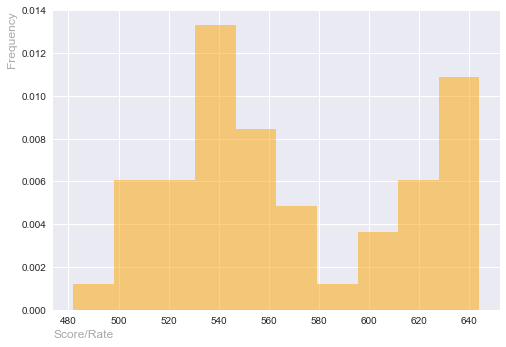

Evidence-Based Reading and Writing - Standard Deviation: 45.667
Evidence-Based Reading and Writing - Min: 482.000
Evidence-Based Reading and Writing - Q1: 533.500
Evidence-Based Reading and Writing - Median: 559.000
Evidence-Based Reading and Writing - Mean: 569.118
Evidence-Based Reading and Writing - Q3: 613.000
Evidence-Based Reading and Writing - Max: 644.000



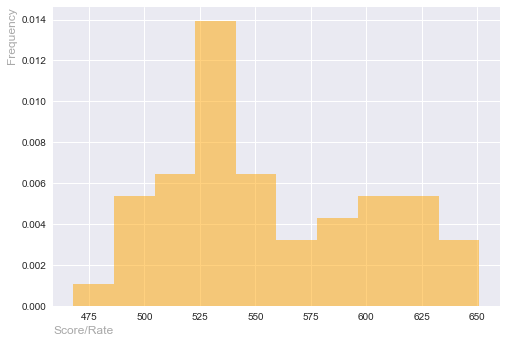

SAT_Math - Standard Deviation: 47.121
SAT_Math - Min: 468.000
SAT_Math - Q1: 523.500
SAT_Math - Median: 548.000
SAT_Math - Mean: 556.882
SAT_Math - Q3: 599.000
SAT_Math - Max: 651.000



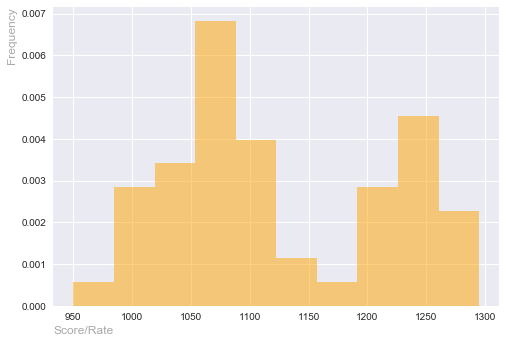

SAT_Total - Standard Deviation: 92.495
SAT_Total - Min: 950.000
SAT_Total - Q1: 1055.500
SAT_Total - Median: 1107.000
SAT_Total - Mean: 1126.098
SAT_Total - Q3: 1212.000
SAT_Total - Max: 1295.000



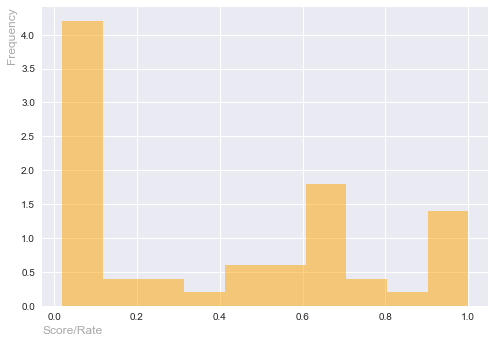

SAT_Participation - Standard Deviation: 0.353
SAT_Participation - Min: 0.020
SAT_Participation - Q1: 0.040
SAT_Participation - Median: 0.380
SAT_Participation - Mean: 0.398
SAT_Participation - Q3: 0.660
SAT_Participation - Max: 1.000



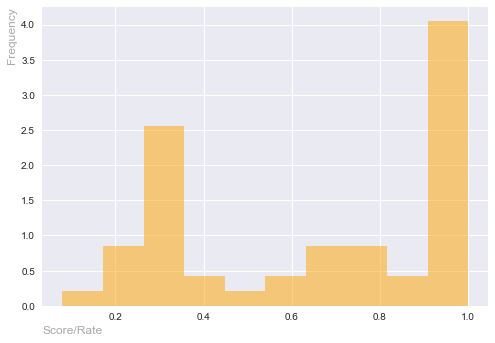

ACT_Participation - Standard Deviation: 0.321
ACT_Participation - Min: 0.080
ACT_Participation - Q1: 0.310
ACT_Participation - Median: 0.690
ACT_Participation - Mean: 0.653
ACT_Participation - Q3: 1.000
ACT_Participation - Max: 1.000



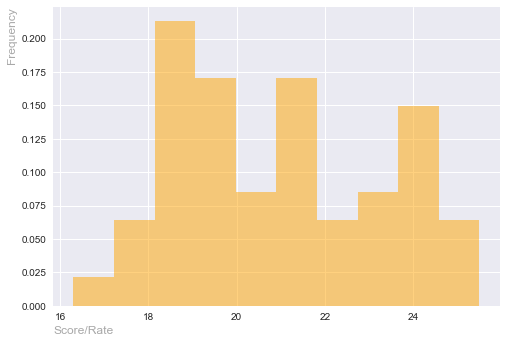

English - Standard Deviation: 2.354
English - Min: 16.300
English - Q1: 19.000
English - Median: 20.700
English - Mean: 20.931
English - Q3: 23.300
English - Max: 25.500



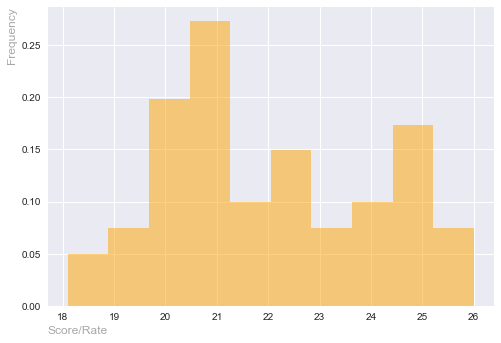

Reading - Standard Deviation: 2.067
Reading - Min: 18.100
Reading - Q1: 20.450
Reading - Median: 21.800
Reading - Mean: 22.014
Reading - Q3: 24.150
Reading - Max: 26.000



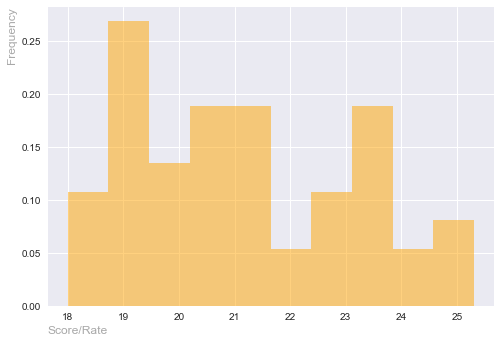

ACT_Math - Standard Deviation: 1.982
ACT_Math - Min: 18.000
ACT_Math - Q1: 19.400
ACT_Math - Median: 20.900
ACT_Math - Mean: 21.182
ACT_Math - Q3: 23.100
ACT_Math - Max: 25.300



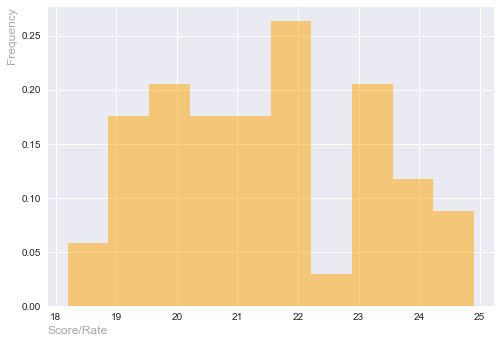

Science - Standard Deviation: 1.739
Science - Min: 18.200
Science - Q1: 19.950
Science - Median: 21.300
Science - Mean: 21.451
Science - Q3: 23.200
Science - Max: 24.900



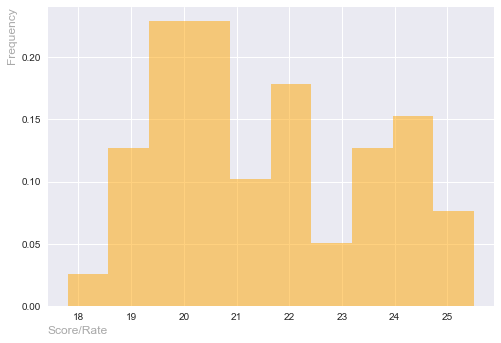

ACT_Composite - Standard Deviation: 2.021
ACT_Composite - Min: 17.800
ACT_Composite - Q1: 19.800
ACT_Composite - Median: 21.400
ACT_Composite - Mean: 21.520
ACT_Composite - Q3: 23.600
ACT_Composite - Max: 25.500



In [28]:
from numpy import percentile
from numpy.random import rand
import scipy.stats as stats
import pylab as pl

analyze_cols = ['Evidence-Based Reading and Writing', 'SAT_Math', 'SAT_Total', 'SAT_Participation', 'ACT_Participation', 'English', 'Reading', 'ACT_Math', 'Science', 'ACT_Composite']

for i in analyze_cols:
    # calculate quartiles
    quartiles = percentile(combined_tests[i], [25, 50, 75])
    
    # calculate mean
    mu = np.mean(combined_tests[i])
    
    # calculate min/max
    min_value, max_value = combined_tests[i].min(), combined_tests[i].max()
    
    # calculate standard deviation
    stdev = combined_tests[i].std()
    
    # charts
    
    plt.ylabel("Frequency", position =(0,1), ha = 'right', fontsize=12, alpha = .4)
    plt.xlabel("Score/Rate", position= (0,0), ha='left', fontsize =12, alpha =.4)
    
    foo = plt.hist(combined_tests[i], normed = True, color = 'orange', alpha = .5) 
    plt.show()
    
    
    
    # print 5-number summary
    print(str(i) + ' - Standard Deviation: %.3f' % stdev)
    print(str(i) + ' - Min: %.3f' % min_value)
    print(str(i) + ' - Q1: %.3f' % quartiles[0])
    print(str(i) + ' - Median: %.3f' % quartiles[1])
    print(str(i) + ' - Mean: %.3f' % mu)
    print(str(i) + ' - Q3: %.3f' % quartiles[2])
    print(str(i) + ' - Max: %.3f' % max_value + '\n')

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

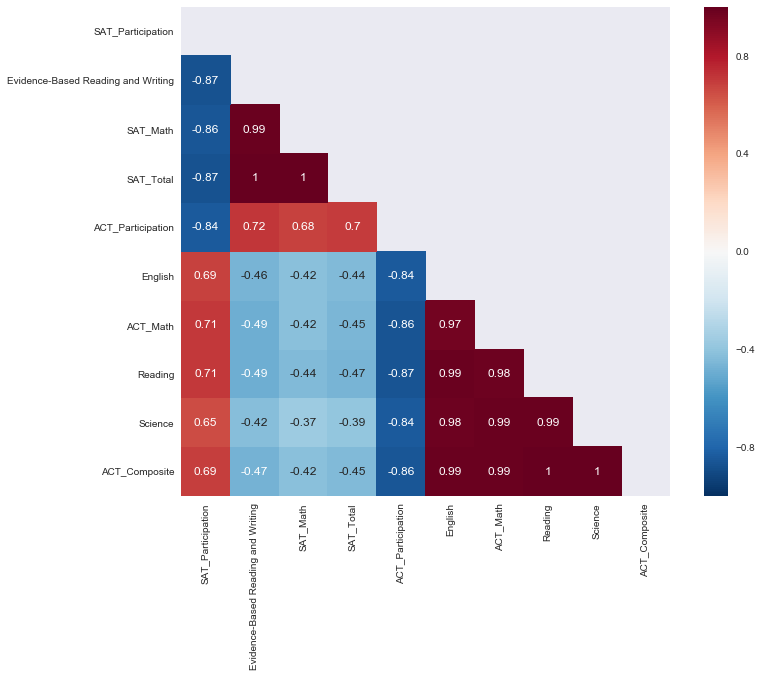

In [29]:
plt.subplots(figsize = (12, 9))

corr = combined_tests.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(corr, mask=mask, square=True, annot = True) 
plt.show()

There is a strong negative correlation for both SAT and ACT Participation. One can observe that in states where ACT and SAT Participations are high, it has a negative correlation with scores.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

Alternate hypothesis = There is a difference between SAT and ACT participation rates.

Null hypothesis = There is no difference between SAT and ACT participation rates.


In [30]:
from scipy import stats

a = combined_tests['SAT_Participation']
b = combined_tests['ACT_Participation']

t = stats.ttest_ind(a,b)
t

## Since the p-value is lower than 0.05, we reject the null hypothesis:
## There is a difference between SAT and ACT participation rates

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [38]:
standard_error_sat = np.std(combined_tests['SAT_Participation'], ddof=1)/np.sqrt(len(combined_tests['SAT_Participation']))
standard_error_act = np.std(combined_tests['ACT_Participation'], ddof=1)/np.sqrt(len(combined_tests['ACT_Participation']))

In [39]:
z = 1.96

sat_mean_participation = np.mean(combined_tests['SAT_Participation'])

ci_lower_sat = sat_mean_participation - (z*standard_error_sat)
ci_upper_sat = sat_mean_participation + (z*standard_error_sat)

ci_lower_sat, ci_upper_sat
#95 CI for SAT is .302 - .495

(0.3012207711116876, 0.4948576602608615)

In [40]:
act_mean_participation = np.mean(combined_tests['ACT_Participation'])

ci_lower_act = act_mean_participation - (z* standard_error_act)
ci_upper_act = act_mean_participation + (z* standard_error_act)

ci_lower_act, ci_upper_act
# 95 CI for ACT is .564 - .741

(0.5643369049287186, 0.7407611342869675)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, because if two statistics have non-overlapping confidence intervals, they are significantly different. This finding corroborates with our p-value that is lower than .05.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [32]:
combined_tests['SAT_Math'].corr(combined_tests['ACT_Math'])
## There is a weak correlation. Let's see if it is significant...

-0.42045603931931763

In [33]:
a = combined_tests['SAT_Math']
b = combined_tests['ACT_Math']

t = stats.ttest_ind(a,b)
t

## Null hypothesis = There is no correlation between SAT and ACT Math Scores.
## Alt. hypothesis = There is a correlation beween SAT and ACT Math Scores.

## p-value is lower than .05 so we reject the null hypothesis. There is a correlation between SAT and ACT Math scores.

Ttest_indResult(statistic=81.11567112237414, pvalue=4.634979306455698e-93)

**There is a weak correlation(-0.42) but since the p-value is lower than 0.05, it is statistically significant. It is appropriate to generate a correlation between SAT and ACT Math scores.**

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

It would be better to conduct descriptive statistics if we are only considering SAT and ACT data for 2017. Statistical inference assumes the SAT and ACT dataset is a part of a larger population (perhaps from multiple years) while descriptive statistics is solely concerned with properties of the observed data.